In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, make_scorer

In [3]:
data_path = os.path.join(os.getcwd(), '..', '..', 'data', 'preprocessed_data.csv')

In [4]:
df = pd.read_csv(data_path)
df.head()

,property_name,room_id,bedroom,bathroom,beds,guests,wifi,tv,cable_tv,ac,...,beachfront,building_staff,lat,lng,booking_window,stay_duration_in_days,avg_rating,avg_review_sentiment_score,rating_count,average_daily_rate
0,Bingin Ombak,431874,1,1,1,2,1,0,0,1,...,1,0,-8.805646,115.113378,81,4,4.3158,0.565051,19,1.477799e+06
1,Bingin Ombak,431875,1,1,1,2,1,0,0,1,...,1,0,-8.805646,115.113378,81,4,4.0857,0.518720,35,1.477799e+06
2,Bingin Ombak,396658,1,1,1,2,1,0,0,1,...,1,0,-8.805646,115.113378,81,4,4.0857,0.518720,35,1.477799e+06
3,Bingin Ombak,396427,1,2,1,2,1,0,0,0,...,1,0,-8.805646,115.113378,81,4,4.5342,0.678392,164,1.477799e+06
4,Bingin Ombak,396427,1,2,1,2,1,0,0,0,...,1,0,-8.805646,115.113378,81,4,4.5342,0.678392,164,1.477799e+06


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56683 entries, 0 to 56682
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_name               56683 non-null  object 
 1   room_id                     56683 non-null  int64  
 2   bedroom                     56683 non-null  int64  
 3   bathroom                    56683 non-null  int64  
 4   beds                        56683 non-null  int64  
 5   guests                      56683 non-null  int64  
 6   wifi                        56683 non-null  int64  
 7   tv                          56683 non-null  int64  
 8   cable_tv                    56683 non-null  int64  
 9   ac                          56683 non-null  int64  
 10  workspace                   56683 non-null  int64  
 11  hot_water                   56683 non-null  int64  
 12  parking                     56683 non-null  int64  
 13  pool                        566

In [50]:
df.shape

(56683, 38)

### Separate features

In [51]:
# Separate features and target variable
X = df.drop(columns=['average_daily_rate', 'property_name', 'room_id'])  # Features
y = df['average_daily_rate']  # Target variable

### Split data

In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create model without parameter

In [53]:
# Initialize the GradientBoostingRegressor model
model = GradientBoostingRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f'Mean Absolute Error on Training: {mae_train}')
print(f'Mean Absolute Error on Test: {mae_test}')

Mean Absolute Error on Training: 152404.87206261972
Mean Absolute Error on Test: 151701.2809266379


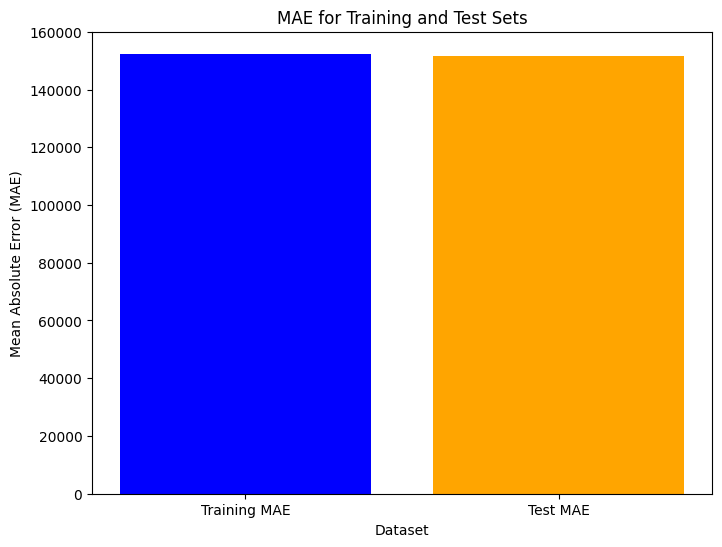

In [54]:
# Visualize MAE for both training and test sets
labels = ['Training MAE', 'Test MAE']
mae_values = [mae_train, mae_test]

plt.figure(figsize=(8, 6))
plt.bar(labels, mae_values, color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for Training and Test Sets')
plt.show()

### Tune the hyperparameter

In [55]:
# Initialize the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(random_state=42)

# Define the grid of parameters to search
param_grid = {
    'n_estimators': [100, 1000, 2000],
    'learning_rate': [0.3, 0.5, 0.7],
    'max_depth': [3, 5, 7]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=5, verbose=2)

# Fit the model on the data
grid_search.fit(X_train, y_train)

# Get the best model
best_gb_regressor = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_gb_regressor.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=100; total time=   7.1s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=100; total time=   6.3s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=100; total time=   7.7s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=100; total time=   5.9s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=100; total time=   6.2s
[CV] END ..learning_rate=0.3, max_depth=3, n_estimators=1000; total time= 1.3min
[CV] END ..learning_rate=0.3, max_depth=3, n_estimators=1000; total time= 1.1min
[CV] END ..learning_rate=0.3, max_depth=3, n_estimators=1000; total time= 1.1min
[CV] END ..learning_rate=0.3, max_depth=3, n_estimators=1000; total time= 1.0min
[CV] END ..learning_rate=0.3, max_depth=3, n_estimators=1000; total time= 1.2min
[CV] END ..learning_rate=0.3, max_depth=3, n_estimators=2000; total time= 2.2min
[CV] END ..learning_rate=0.3, max_depth=3, n_es

### Cross validation

MAE scores for each fold: [83915.59755274 77415.81569199 82079.75757312 81358.80487373
 78191.48094628]
Mean MAE on Cross Validation: 80592.29132757176


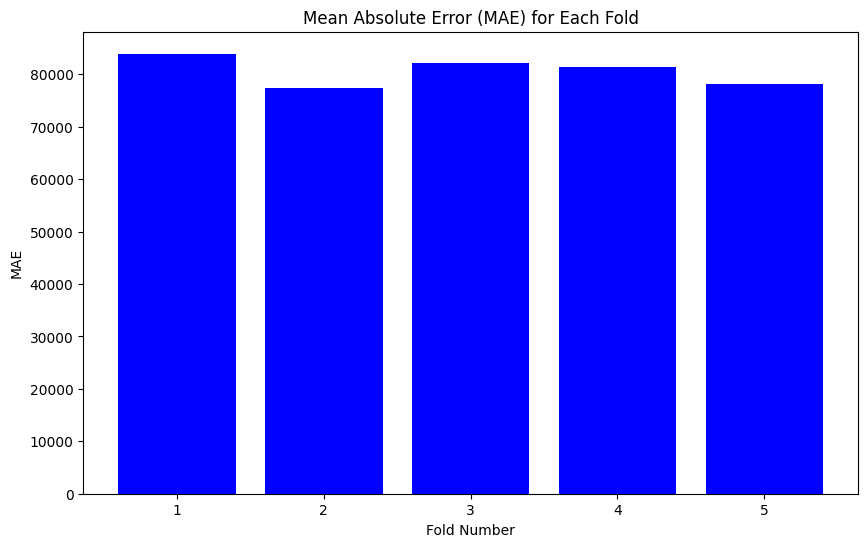

MAE on testing: 76102.95693336624


In [58]:
# Initialize the best model
best_model = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.3, max_depth=5, random_state=42)

# Define the k-fold cross-validation scheme
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring function
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform cross-validation on the best model
scores = cross_val_score(best_model, X_train, y_train, scoring=scorer, cv=kf)

# Since scoring='neg_mean_absolute_error', the results are negative, so we take the absolute values
mae_scores = -scores

# Print MAE for each fold
print("MAE scores for each fold:", mae_scores)

# Mean of MAE values
print("Mean MAE on Cross Validation:", mae_scores.mean())

# Visualize MAE for each fold
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(mae_scores) + 1), mae_scores, color='blue')
plt.xlabel('Fold Number')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE) for Each Fold')
plt.xticks(range(1, len(mae_scores) + 1))
plt.show()

# Train the model on the data
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred_cv = best_model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_cv)
print("MAE on testing:", mae)

### Model with best parameter

In [60]:
# Initialize the GradientBoostingRegressor model
best_model = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.3, max_depth=5, random_state=42)

# Fit the model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f'Mean Absolute Error on Training: {mae_train}')
print(f'Mean Absolute Error on Test: {mae_test}')

Mean Absolute Error on Training: 56958.5816045122
Mean Absolute Error on Test: 76102.95693336624


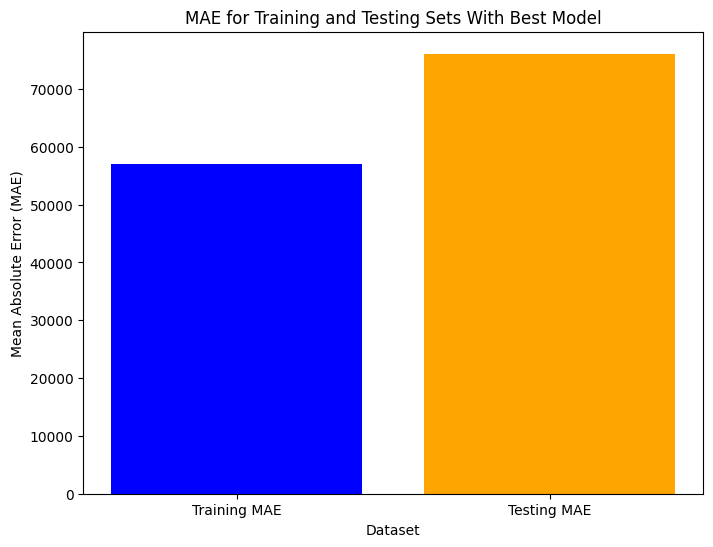

In [61]:
# Visualize MAE for both training and test sets
labels = ['Training MAE', 'Testing MAE']
mae_values = [mae_train, mae_test]

plt.figure(figsize=(8, 6))
plt.bar(labels, mae_values, color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for Training and Testing Sets With Best Model')
plt.show()

### Feature importances

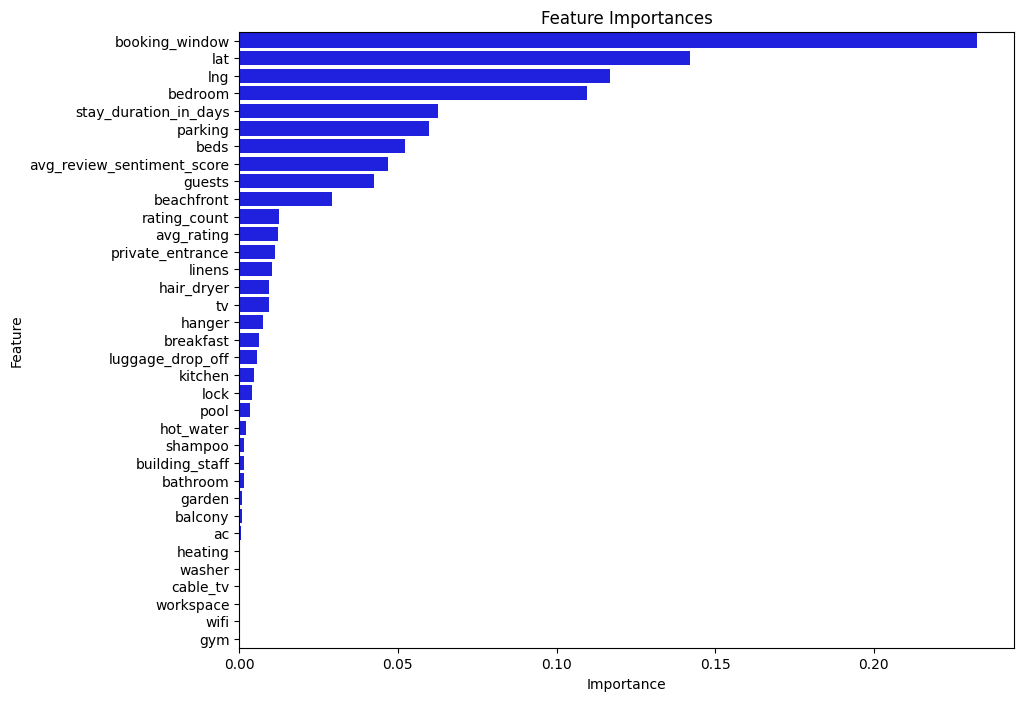

Mean Absolute Error: 76102.95693336624


In [62]:
model = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.3, max_depth=5, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Get feature importances from the best model
feature_importances = model.feature_importances_

# Create a DataFrame to store feature importances with corresponding column names
fi_df = pd.DataFrame({'Feature': X.columns, 
                      'Importance': feature_importances})

# Sort the DataFrame by feature importance values
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# Set the figure size for better readability
plt.figure(figsize=(10, 8))

# Create a barplot with Seaborn
sns.barplot(x='Importance', y='Feature', data=fi_df, color='blue')

# Add title and labels to the plot
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Show the plot
plt.show()

# Make predictions on the test set using the best model
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

### Model with feature importance

In [5]:
X_important = df[['booking_window', 'lat', 'lng', 'stay_duration_in_days', 
                  'bedroom', 'beds', 'parking', 'bathroom', 'beachfront', 'guests']]
y_important = df['average_daily_rate']

# Split the important data into training and testing sets
X_train_important, X_test_important, y_train_important, y_test_important = train_test_split(X_important, y_important, test_size=0.2, random_state=42)

### Tuned model with feature importance

In [7]:
# Initialize the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(random_state=42)

# Define the grid of parameters to search
param_grid = {
    'n_estimators': [100, 1000, 2000],
    'learning_rate': [0.3, 0.5, 0.7],
    'max_depth': [3, 5, 7]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=5, verbose=2, n_jobs=-1)

# Fit the model on the data
grid_search.fit(X_train_important, y_train_important)

# Get the best model
best_gb_regressor = grid_search.best_estimator_

# Make predictions on the test set
y_pred_important_train = best_gb_regressor.predict(X_train_important)
y_pred_important_test = best_gb_regressor.predict(X_test_important)

# Calculate MAE
mae_important_train = mean_absolute_error(y_train_important, y_pred_important_train)
mae_important_test = mean_absolute_error(y_test_important, y_pred_important_test)
print(f'Mean Absolute Error on Training: {mae_important_train}')
print(f'Mean Absolute Error on Testing: {mae_important_test}')

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=100; total time=   3.7s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=100; total time=   3.8s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=100; total time=   3.8s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=100; total time=   3.9s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=100; total time=   4.3s
[CV] END ..learning_rate=0.3, max_depth=3, n_estimators=1000; total time=  42.7s
[CV] END ..learning_rate=0.3, max_depth=3, n_estimators=1000; total time=  43.2s
[CV] END ..learning_rate=0.3, max_depth=3, n_estimators=1000; total time=  43.3s
[CV] END ..learning_rate=0.3, max_depth=3, n_estimators=1000; total time=  42.5s
[CV] END ..learning_rate=0.3, max_depth=3, n_estimators=1000; total time=  44.3s
[CV] END ..learning_rate=0.3, max_depth=3, n_estimators=2000; total time= 1.4min
[CV] END ..learning_rate=0.3, max_depth=3, n_es

MAE scores for each fold: [60947.94947622 56434.74810958 60690.72393024 60026.3658909
 58771.33456457]
Mean MAE on Cross Validation: 59374.22439430087


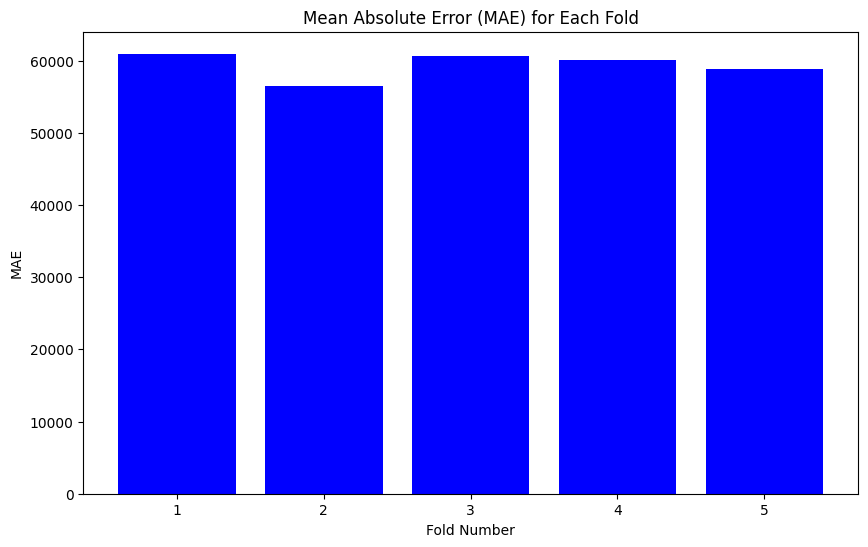

MAE on testing: 57417.39870447592


In [8]:
# Initialize the best model
best_model = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.3, max_depth=7, random_state=42)

# Define the k-fold cross-validation scheme
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring function
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform cross-validation on the best model
scores = cross_val_score(best_model, X_train_important, y_train_important, scoring=scorer, cv=kf)

# Since scoring='neg_mean_absolute_error', the results are negative, so we take the absolute values
mae_scores_important = -scores

# Print MAE for each fold
print("MAE scores for each fold:", mae_scores_important)

# Mean of MAE values
print("Mean MAE on Cross Validation:", mae_scores_important.mean())

# Visualize MAE for each fold
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(mae_scores_important) + 1), mae_scores_important, color='blue')
plt.xlabel('Fold Number')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE) for Each Fold')
plt.xticks(range(1, len(mae_scores_important) + 1))
plt.show()

# Train the model on the data
best_model.fit(X_train_important, y_train_important)

# Predict on the test set
y_pred_cv_important = best_model.predict(X_test_important)

# Calculate MAE
mae = mean_absolute_error(y_test_important, y_pred_cv_important)
print("MAE on testing:", mae)

In [9]:
# Initialize the GradientBoostingRegressor model
model = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.3, max_depth=7, random_state=42)

# Fit the model on the training important data
model.fit(X_train_important, y_train_important)

# Make predictions on the test important data
y_pred_important_train = model.predict(X_train_important)
y_pred_important_test = model.predict(X_test_important)

# Evaluate the model
mae_important_train = mean_absolute_error(y_train_important, y_pred_important_train)
mae_important_test = mean_absolute_error(y_test_important, y_pred_important_test)
print(f'Mean Absolute Error on Training: {mae_important_train}')
print(f'Mean Absolute Error on Test: {mae_important_test}')

Mean Absolute Error on Training: 49069.150833037165
Mean Absolute Error on Test: 57417.39870447592


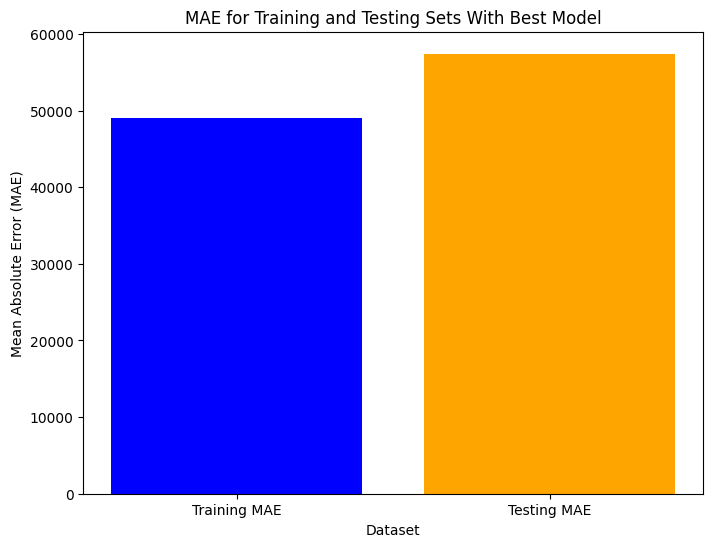

In [10]:
# Visualize MAE for both training and test sets
labels = ['Training MAE', 'Testing MAE']
mae_values = [mae_important_train, mae_important_test]

plt.figure(figsize=(8, 6))
plt.bar(labels, mae_values, color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for Training and Testing Sets With Best Model')
plt.show()

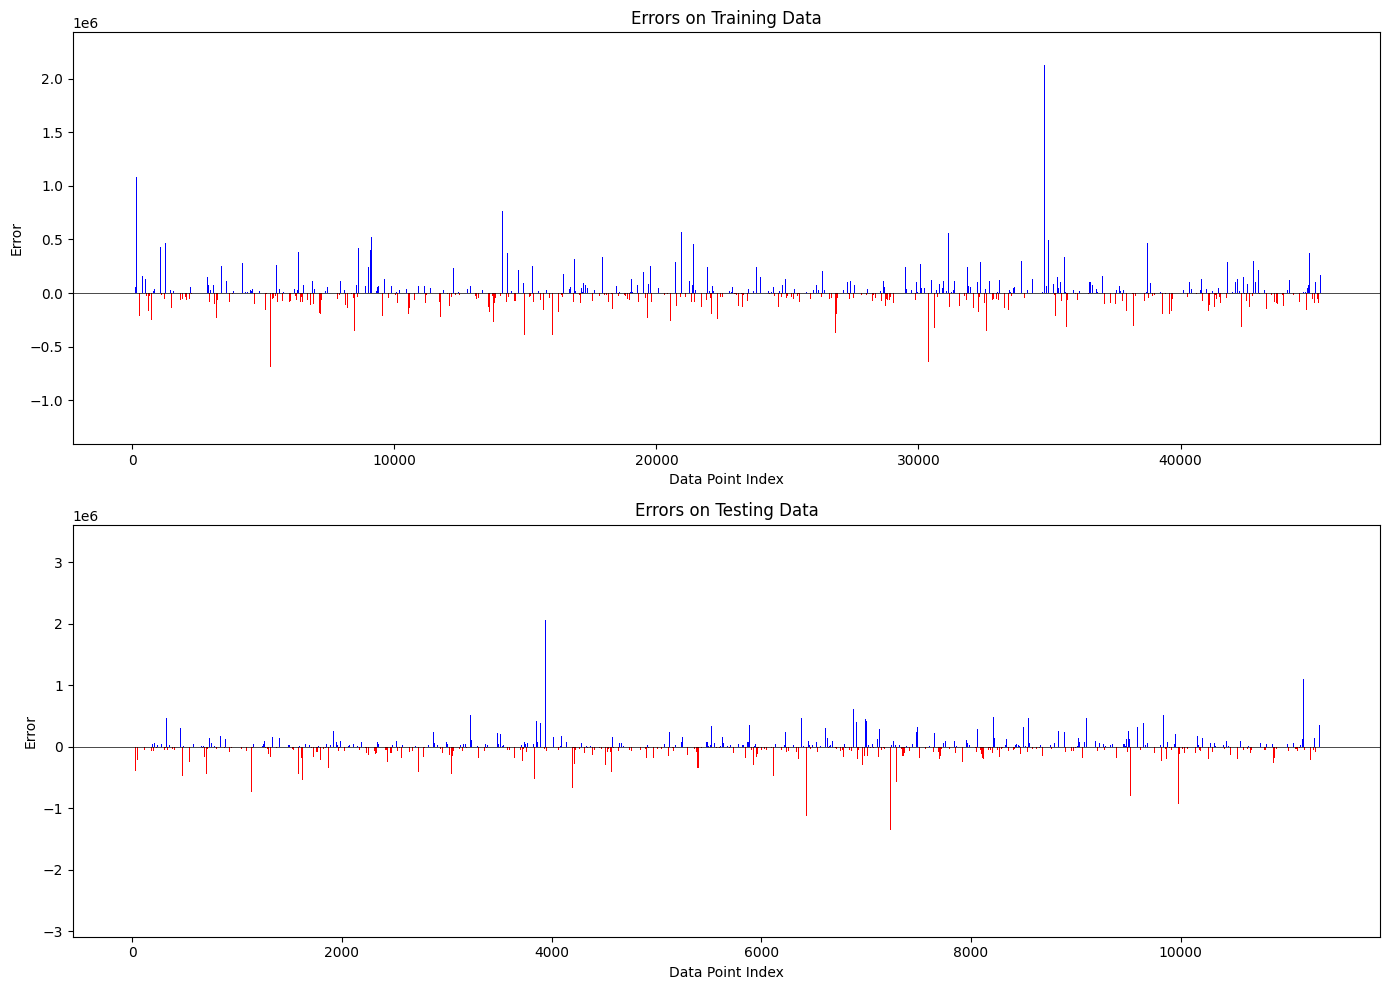

In [11]:
import numpy as np

# Calculate errors
errors_train = y_train_important - y_pred_important_train
errors_test = y_test_important - y_pred_important_test

# Create a figure and axes
fig, axs = plt.subplots(2, 1, figsize=(14, 10))

# Plot training errors
axs[0].bar(range(len(errors_train)), errors_train, color=np.where(errors_train > 0, 'blue', 'red'))
axs[0].axhline(0, color='black', linewidth=0.5)
axs[0].set_title('Errors on Training Data')
axs[0].set_xlabel('Data Point Index')
axs[0].set_ylabel('Error')
axs[0].set_ylim(min(errors_train) * 1.1, max(errors_train) * 1.1)

# Plot testing errors
axs[1].bar(range(len(errors_test)), errors_test, color=np.where(errors_test > 0, 'blue', 'red'))
axs[1].axhline(0, color='black', linewidth=0.5)
axs[1].set_title('Errors on Testing Data')
axs[1].set_xlabel('Data Point Index')
axs[1].set_ylabel('Error')
axs[1].set_ylim(min(errors_test) * 1.1, max(errors_test) * 1.1)

# Adjust layout
plt.tight_layout()
plt.show()

In [12]:
# Create DataFrames for training and testing datasets
train_data = pd.DataFrame({
    'index': X_train_important.index,
    'average_daily_rate': y_train_important,
    'predicted': y_pred_important_train, 
    'error': errors_train
})

test_data = pd.DataFrame({
    'index': X_test_important.index,
    'average_daily_rate': y_test_important,
    'predicted': y_pred_important_test, 
    'error': errors_test
})

# Optionally, concatenate the training and testing datasets into one DataFrame
combined_data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)

# Sort the combined DataFrame by the 'error' column in ascending order
sorted_combined_data = combined_data.sort_values(by='error', ascending=True).reset_index(drop=True)

# Display the first few rows of the sorted DataFrame
sorted_combined_data.head(10)

,index,average_daily_rate,predicted,error
0,51629,1.620324e+06,4.429402e+06,-2.809078e+06
1,51630,1.620324e+06,4.429402e+06,-2.809078e+06
2,23878,8.301597e+05,3.366577e+06,-2.536417e+06
3,9803,6.701236e+05,2.340512e+06,-1.670388e+06
4,9804,6.701236e+05,2.340512e+06,-1.670388e+06
5,52519,1.953391e+06,3.509220e+06,-1.555829e+06
6,5553,5.150878e+06,6.635413e+06,-1.484535e+06
7,6583,2.750562e+06,4.101118e+06,-1.350557e+06
8,3255,7.506161e+05,2.032781e+06,-1.282165e+06
9,3248,7.506161e+05,2.032781e+06,-1.282165e+06


In [61]:
# Filter the DataFrame to include only rows where the absolute value of the error is above 100,000
filtered_data = sorted_combined_data[sorted_combined_data['error'].abs() > 100000]

# Display the filtered DataFrame
filtered_data.shape

(8473, 4)

### Save model

In [13]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']

### Load model

In [14]:
# Load the trained gradient_boosting_model
gradientBoosting_model = joblib.load(os.path.join(os.getcwd(), '..', '..', 'data', 'gradient_boosting_model.pkl'))

# Use gradient_boosting_model to make predictions
gradientBoosting_predictions_test = gradientBoosting_model.predict(X_test_important)

# Now you can use these predictions in your TensorFlow code
print(gradientBoosting_predictions_test[:10])

[ 568484.54735233  522638.47580457  412393.63862637 1910389.17205318
  464118.31847309  372580.64856099  480048.28263571  413400.84073826
  362089.04768922  975200.46109896]


### Pipeline for prediction

In [15]:
predicted_column = ['property_name', 'room_id', 
                    'booking_window', 'lat', 'lng', 'stay_duration_in_days', 
                    'bedroom', 'beds', 'parking', 'bathroom', 'beachfront', 
                    'guests', 'average_daily_rate']

X_predicted = df[predicted_column]

In [16]:
distinct_data = X_predicted.drop_duplicates(subset=['property_name', 'room_id'])

### Save Distinct Data

In [17]:
distinct_data.to_csv('gradientboosting_distinct_data.csv', index=False)

In [58]:
import pandas as pd
from datetime import date
import joblib

def get_distinct_properties(df):
    return df.drop_duplicates(subset=['property_name', 'room_id'])

def booking_window(today, check_in):
    return (check_in - today).days

def stay_duration(check_in, check_out):
    return (check_out - check_in).days

def predict(predicted_df, property_name, room_id, check_in, check_out):
    # Select property name and room_id
    filtered_df = predicted_df[(predicted_df['property_name'] == property_name) & 
                              (predicted_df['room_id'] == room_id)].copy()
    
    if filtered_df.empty:
        raise ValueError("No matching property_name and room_id found in the data")
    
    # Save the current price
    current_price = filtered_df['average_daily_rate'].values
    
    # Drop unnecessary columns
    filtered_df.drop(columns=['property_name', 'room_id', 'average_daily_rate'], inplace=True)
    
    # Feature engineering booking window
    today = date.today()
    booking_window_days = booking_window(today, check_in)
    
    # Feature engineering stay duration
    stay_duration_days = stay_duration(check_in, check_out)
    
    # Replace values in columns
    filtered_df['stay_duration_in_days'] = stay_duration_days
    filtered_df['booking_window'] = booking_window_days
    
    # print("Filtered DataFrame after replacing values:\n", filtered_df)
    print("Booking window (days):", booking_window_days)
    print("Stay duration (days):", stay_duration_days)
    
    # Predict
    gradientBoosting_model = joblib.load(os.path.join(os.getcwd(), '..', '..', 'data', 'gradient_boosting_model.pkl'))
    gradientBoosting_predictions_test = gradientBoosting_model.predict(filtered_df)
    
    return gradientBoosting_predictions_test, current_price

def format_currency(value):
    value_str = f"{value:,.2f}"
    value_str = value_str.replace(',', 'X').replace('.', ',').replace('X', '.')
    return f"Rp {value_str}"

# Example usage
check_in = date(2024, 6, 20)
check_out = date(2024, 6, 25)

prediction, current_price = predict(distinct_data, 'Pondok Bagus Guesthouse', 397680, check_in, check_out)
formatted_current_price = format_currency(current_price[0])
formatted_prediction = format_currency(prediction[0])

print("Current Price:", formatted_current_price)
print("Prediction:", formatted_prediction)

Booking window (days): 8
Stay duration (days): 5
Current Price: Rp 410.111,41
Prediction: Rp 456.148,57


In [59]:
filtered_df = distinct_data[(distinct_data['property_name'] == 'Pondok Bagus Guesthouse') & 
                              (distinct_data['room_id'] == 397680)].copy()

filtered_df.head()

,property_name,room_id,booking_window,lat,lng,stay_duration_in_days,bedroom,beds,parking,bathroom,beachfront,guests,average_daily_rate
1005,Pondok Bagus Guesthouse,397680,1,-8.652609,115.13751,1,1,1,1,1,0,2,410111.41


### Pipeline with new input

In [60]:
from datetime import date
import joblib

def booking_window(today, check_in):
    return (check_in - today).days

def stay_duration(check_in, check_out):
    return (check_out - check_in).days

def predict_new_data(lat, lng,
                     bedroom, beds, 
                     parking, bathroom, 
                     beachfront, guests, 
                     check_in, 
                     check_out):
    
    # Feature engineering booking window
    today = date.today()
    booking_window_days = booking_window(today, check_in)
    
    # Feature engineering stay duration
    stay_duration_days = stay_duration(check_in, check_out)

    data = np.array([[booking_window_days, lat, lng, stay_duration_days, 
                      bedroom, beds, parking, bathroom, beachfront, 
                      guests]])
    
    gradientBoosting_model = joblib.load(os.path.join(os.getcwd(), '..', '..', 'data', 'gradient_boosting_model.pkl'))
    gradientBoosting_prediction = gradientBoosting_model.predict(data)
    
    return gradientBoosting_prediction


def format_currency(value):
    value_str = f"{value:,.2f}"
    value_str = value_str.replace(',', 'X').replace('.', ',').replace('X', '.')
    return f"Rp {value_str}"


check_in = date(2024, 6, 20)
check_out = date(2024, 6, 25)

prediction = predict_new_data(-8.652609, 115.13751, 1, 
                              1, 1, 1, 
                              0, 2, 
                              check_in, check_out)
print("Prediction:", format_currency(prediction[0]))

Prediction: Rp 456.148,57


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
